In [55]:
from qiskit import QuantumCircuit, transpile

from qiskit.quantum_info import SparsePauliOp
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from VQLS import getApproximationValue, plotCost, minimization, getMatrixCoeffitients, ansatzTest
from LSSVM import predict, lssvmMatrix, prepareLabels, accuracy

In [37]:
auxiliaryQubit = 0
shots = 10000 # 100000
gamma = 0.01 # regularization parameter
testSize = 0.2

In [38]:
X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45
)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=testSize, random_state=42
)
subsetSize = 7
subsetIndices = np.random.choice(np.arange(X_train.shape[0]), subsetSize, replace=False)
xSubset = np.array([X_train[i] for i in subsetIndices])
ySubset = np.array([y_train[i] for i in subsetIndices])

inputMatrix = lssvmMatrix(xSubset, gamma, "linearKernel")
yVector = prepareLabels(ySubset)

print("LS-SVM Matrix:", inputMatrix)

pauliOp = SparsePauliOp.from_operator(inputMatrix)
paulis = pauliOp.paulis
print(paulis)

coefficientSet = getMatrixCoeffitients(pauliOp)
print(coefficientSet)

outF = minimization(
    paulis=paulis,
    coefficientSet=coefficientSet,
    totalNeededQubits=pauliOp.num_qubits + 2,
    bVector=yVector,
    quantumSimulation=False,
)
circ = QuantumCircuit(pauliOp.num_qubits, pauliOp.num_qubits)
o = ansatzTest(circ, outF)

getApproximationValue(inputMatrix, yVector, o)
plotCost()

LS-SVM Matrix: [[ 0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.01682486e+02  2.50043110e-01  5.56300620e-01
  -2.56485786e-01  2.58701777e-03 -1.01657000e-01  6.34300633e-02]
 [ 1.00000000e+00  2.50043110e-01  1.00527928e+02  1.27755289e-02
  -5.13385000e-01 -7.77675524e-01 -9.11482637e-01  1.32475858e+00]
 [ 1.00000000e+00  5.56300620e-01  1.27755289e-02  1.00193892e+02
  -1.71134164e-02  1.11673200e-01  9.40571460e-02 -1.66367949e-01]
 [ 1.00000000e+00 -2.56485786e-01 -5.13385000e-01 -1.71134164e-02
   1.00499357e+02  7.53091691e-01  8.83561174e-01 -1.28345857e+00]
 [ 1.00000000e+00  2.58701777e-03 -7.77675524e-01  1.11673200e-01
   7.53091691e-01  1.01233536e+02  1.42095127e+00 -2.08522216e+00]
 [ 1.00000000e+00 -1.01657000e-01 -9.11482637e-01  9.40571460e-02
   8.83561174e-01  1.42095127e+00  1.01643349e+02 -2.40625409e+00]
 [ 1.00000000e+00  6.34300633e-02  1.32475858e+00 -1.6

TypeError: minimization() got an unexpected keyword argument 'quantumSimulation'

Statevector([ 0.014413  +0.j,  0.3253783 +0.j,  0.01636644+0.j,
             -0.58740821+0.j, -0.01480191+0.j, -0.50133836+0.j,
             -0.01482575+0.j,  0.54481732+0.j],
            dims=(2, 2, 2))
[ -0.23181217+0.j  33.08254497+0.j   1.26966403+0.j -57.01428398+0.j
  -0.41348647+0.j -53.03024929+0.j   0.6045469 +0.j  57.72641534+0.j]


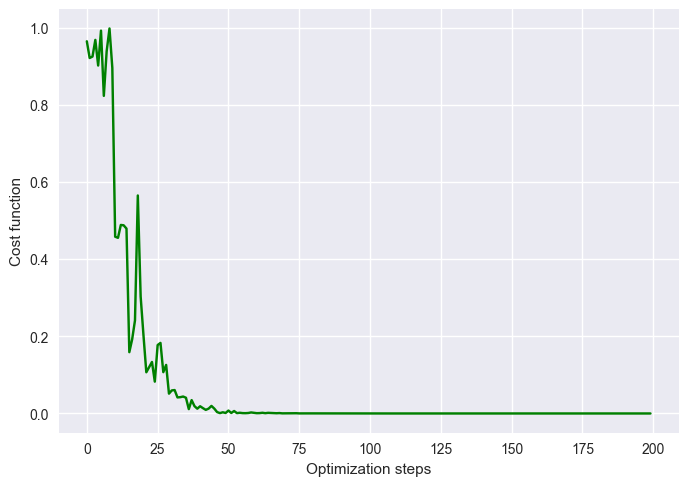

In [ ]:
print(o)
print(inputMatrix.dot(o))

getApproximationValue(inputMatrix, yVector, o)
plotCost()

In [ ]:
subsetIndicesTest = np.random.choice(
    np.arange(X_test.shape[0]), subsetSize, replace=False
)
xTestSubset = []
yTestSubset = []
for i in subsetIndicesTest:
    xTestSubset.append(X_test[i])
    yTestSubset.append(y_test[i])

xTestSubset = np.array(xTestSubset)
yTestSubset = np.array(yTestSubset)
print(o)
b = o[0]
print(b)
w = []
for i in range(len(o)):
    if i != 0:
        w.append(o[i])
print(w)
predictions = predict(xSubset, xTestSubset, w, b)
print("Predictions:", predictions)
print("Accuracy:", accuracy(yTestSubset, predictions))

Statevector([ 0.014413  +0.j,  0.3253783 +0.j,  0.01636644+0.j,
             -0.58740821+0.j, -0.01480191+0.j, -0.50133836+0.j,
             -0.01482575+0.j,  0.54481732+0.j],
            dims=(2, 2, 2))
(0.0144130023+0j)
[(0.3253782961+0j), (0.0163664376+0j), (-0.5874082066+0j), (-0.0148019067+0j), (-0.5013383607+0j), (-0.0148257549+0j), (0.5448173244+0j)]
Predictions: [-1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j]
Accuracy: 0.7142857142857143
